In [8]:
import torch
import os


class Para:
    feature_column_start_name = 'ep_ratio_ttm' # 'VOL5'
    feature_column_end_name = 'BR' # 'AROON_DOWN'

    feature_num = 16 # 8

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

    data_path = 'data/zj_space_1d_rate_20d_22-22_pre'
    model_path = 'models/model_zj_c2_s0.1_b16_lr0.001_d0.5_e5.pth'

    classification_n = 2

    month_num = len(os.listdir(data_path))

para = Para()
print(para.month_num)

1


In [9]:
import numpy as np
import torch
from my_utils.model_class import MLP5
import pandas as pd

def insert_predict(df: pd.DataFrame, model_path, out_nums: int, column_name: str) -> pd.DataFrame:

    # 加载模型
    model = MLP5(in_nums=para.feature_num, out_nums=out_nums, drop_p=0.5)
    model.load_state_dict(torch.load(model_path, map_location=para.device))
    model = model.to(para.device)

    # 运算
    model.eval()
    predict_tensor = model(torch.Tensor(df.loc[:, para.feature_column_start_name: para.feature_column_end_name].values).to(device=para.device))

    # 插入 predict_tensor 列
    df.insert(loc=0, column='predict_tensor_'+column_name, value=np.nan)
    # 插入 predict_return_bin 列
    df.insert(loc=0, column='predict_return_bin_'+column_name, value=np.nan)

    df['predict_tensor'+'_'+column_name] = predict_tensor.to(device='cpu').detach().numpy().tolist()
    df['predict_return_bin'+'_'+column_name] = predict_tensor.to(device='cpu').detach().numpy().argmax(1)

    return df

In [10]:
df = pd.DataFrame()

for i_csv in range(para.month_num):
    df = pd.read_csv(para.data_path +'/' + str(i_csv) + '.csv', index_col='order_book_id')

df

,board_type,sector_code,month,date,yield_rate,ep_ratio_ttm,pb_ratio_ttm,sp_ratio_ttm,MACD_DIFF,MACD_DEA,...,RSI10,SY,BIAS20,VOL30,VOL60,VOL120,VOLT20,VOLT60,AR,BR
order_book_id,,,,,,,,,,,,,,,,,,,,,
600895.XSHG,MainBoard,Industrials,0,2022-01-04,0.120287,-1.216425,1.234824,-1.216425,0.921928,0.673301,...,0.830985,0.314678,1.071733,-0.805060,0.381789,1.997874,-0.962711,2.157914,0.387279,0.937609
600895.XSHG,MainBoard,Industrials,1,2022-01-05,-0.074175,-1.441653,1.481524,-1.441653,1.105318,0.763155,...,0.212479,1.398567,1.354871,0.068267,0.609952,2.028502,-1.078562,1.965948,1.177424,2.052567
600895.XSHG,MainBoard,Industrials,2,2022-01-06,0.107779,-1.291895,1.317057,-1.291895,1.190093,0.855655,...,0.712399,1.398567,1.059079,0.194014,0.687841,1.972035,-1.194954,1.775954,1.484457,1.288310
600895.XSHG,MainBoard,Industrials,3,2022-01-07,-0.258476,-1.515946,1.563757,-1.515946,1.348530,0.968186,...,1.917662,2.482457,1.422083,0.644449,0.832841,1.769531,-1.201256,1.604993,1.508710,1.727722
600895.XSHG,MainBoard,Industrials,4,2022-01-10,-0.251266,-1.366971,1.399290,-1.366971,1.410984,1.073399,...,1.520467,1.398567,1.171990,0.725082,0.891935,1.636550,-1.186633,1.421105,1.472095,1.525703
600895.XSHG,MainBoard,Industrials,5,2022-01-11,-0.344670,-1.385678,1.419849,-1.385678,1.465876,1.170919,...,1.520467,1.398567,1.197558,0.692807,0.949128,1.408502,-1.177232,1.226002,1.594011,1.678640
600895.XSHG,MainBoard,Industrials,6,2022-01-12,-0.180630,-1.216425,1.234824,-1.216425,1.438272,1.242222,...,0.990133,1.398567,0.926519,0.760997,1.029953,0.660111,-1.177232,1.003099,1.461698,1.513996
600895.XSHG,MainBoard,Industrials,7,2022-01-13,-0.268461,-1.064283,1.070358,-1.064283,1.353945,1.278756,...,0.699809,1.398567,0.699100,0.905180,1.120005,0.373510,-1.173836,0.781761,1.594011,1.183280
600895.XSHG,MainBoard,Industrials,8,2022-01-14,0.473781,-0.339134,0.309701,-0.339134,1.005894,1.223340,...,-0.197557,0.314678,-0.356862,1.366416,1.443199,0.328504,-0.937018,0.566887,1.231709,0.516034


In [11]:
import torchmetrics
import time
import matplotlib.pyplot as plt
import torch.nn.functional as F

precision = torchmetrics.Precision(average='none', num_classes=para.classification_n)
accuracy = torchmetrics.Accuracy()

# 插入预测数据
df = insert_predict(df=df, model_path=para.model_path, out_nums=para.classification_n, column_name='2c')

# 综合多个预测数据
df.insert(loc=0, column='predict_return_bin', value=np.nan)
df.loc[df['predict_return_bin_2c'].isin([0,]), 'predict_return_bin'] = 0
df['predict_return_bin'].replace(to_replace=np.nan, value=1, inplace=True)
df['predict_return_bin'] = df['predict_return_bin'].astype('int64')

df.insert(loc=0, column='probability', value=np.nan)
for stock_id in range(len(df.index)):
    df.iloc[stock_id, 0] = F.softmax(torch.tensor(df.iloc[stock_id, df.columns.get_loc('predict_tensor_2c')]), dim=0).numpy()[0]

# 插入实际 return_bin 列
df.insert(loc=0, column='return_bin', value=np.nan)
df.loc[df['yield_rate'] > 0.0, 'return_bin'] = 0
df['return_bin'].replace(to_replace=np.nan, value=1, inplace=True)
df['return_bin'] = df['return_bin'].astype('int64')

# 计算精确率
df = df.sort_values(by='probability', ascending=False)

pred = torch.tensor(df['predict_return_bin']).type(torch.LongTensor)
target = torch.tensor(df['return_bin']).type(torch.LongTensor)

print(pred)
print(target)

print(precision(preds=pred, target=target))
print(accuracy(preds=pred, target=target))

print(df.loc[df['yield_rate']>0.0, 'predict_return_bin'].value_counts())
print(df['return_bin'].value_counts())

tensor([0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1])
tensor([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 1])
tensor([1.0000, 0.5926])
tensor(0.6452)
1    11
0     4
Name: predict_return_bin, dtype: int64
1    16
0    15
Name: return_bin, dtype: int64


In [12]:
from rqdatac import get_price
import rqdatac

rqdatac.init()
hs300_df = get_price(order_book_ids='000300.XSHG', start_date='2022-01-01', end_date='2022-03-22', fields='close')

c:\users\millet\miniconda3\envs\torch1.8-gpu\lib\site-packages\rqdatac\client.py:197: UserWarning: rqdatac is already inited. Settings will be changed.
  warnings.warn("rqdatac is already inited. Settings will be changed.", stacklevel=0)


<AxesSubplot:xlabel='date'>

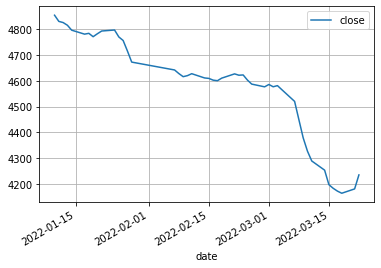

In [13]:
hs300 = hs300_df.reset_index(level='order_book_id').drop(labels='order_book_id', axis=1)
hs300.rolling(5).mean().plot(grid=True)

## 测试模型预测

In [14]:
import torch
from my_utils.model_class import MLP5

model = MLP5(in_nums=22, out_nums=2, drop_p=0.5)
model.load_state_dict(torch.load('models/model_c2_p[[0.0, 0.3], [0.7, 1.0]]_b32_lr0.001_d0.5_e500.pth', map_location=para.device))
model = model.to(para.device)

model.eval()
a = model(torch.Tensor([[0.5]*22]*4).to(device=para.device))
a

FileNotFoundError: [Errno 2] No such file or directory: 'models/model_c2_p[[0.0, 0.3], [0.7, 1.0]]_b32_lr0.001_d0.5_e500.pth'